# Chemical Space Analysis of SARS Coronavirus 3C-like Proteinase

![cover picture](https://www.outsourcing-pharma.com/var/wrbm_gb_food_pharma/storage/images/publications/pharmaceutical-science/outsourcing-pharma.com/headlines/preclinical-research/platform-designed-to-accelerate-drug-discovery-development/11596587-1-eng-GB/Platform-designed-to-accelerate-drug-discovery-development.jpg)

In computational drug discovery, accessing and preparing high-quality data is a critical step. One valuable resource for this purpose is the ChEMBL database, a comprehensive repository of biologically active compounds. These compounds have been tested for their activity against specific target organisms or proteins, making the data ideal for drug discovery projects.

This guide will walk you through the process of downloading and pre-processing biological activity data from the ChEMBL database. By following these steps, you will be able to prepare datasets of compounds and their corresponding biological activity, enabling you to perform analyses such as virtual screening, machine learning model development, and other computational techniques to identify potential drug candidates.

## Installation

### ChEMBL Database
- ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs. (https://www.ebi.ac.uk/chembl/)

In [1]:
# !pip install chembl_webresource_client, rdkit, numpy, pandas, seaborn, scipy ## uncomment this

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

sns.set_palette("Set3")
colors = sns.color_palette()
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

import warnings
warnings.filterwarnings("ignore")

<Figure size 600x400 with 0 Axes>

## Search Target Protein from ChEMBL Database

In [3]:
target = new_client.target
target_query = target.search("coronavirus")

In [4]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### Select SARS coronavirus 3C-like proteinase - Single Protein

In [5]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

### Filter selected protein for IC50 

### IC50
- The IC50 (half-maximal inhibitory concentration) value is a measure of the concentration of a drug or compound required to inhibit a particular biological or biochemical process by 50%.

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)

In [8]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                0 non-null      object
 1   activity_comment           0 non-null      object
 2   activity_id                133 non-null    int64 
 3   activity_properties        133 non-null    object
 4   assay_chembl_id            133 non-null    object
 5   assay_description          133 non-null    object
 6   assay_type                 133 non-null    object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               133 non-null    object
 10  bao_format                 133 non-null    object
 11  bao_label                  133 non-null    object
 12  canonical_smiles           133 non-null    object
 13  data_validity_comment      27 non-null     object
 14  data_valid

### Export Filtered Protein Data as CSV

In [10]:
df.to_csv("bioactivity_data.csv", index=False)

### Read Filtered Dataset

In [11]:
data = pd.read_csv("bioactivity_data.csv")

In [12]:
data.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20
1,NaN,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40
2,NaN,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50
3,NaN,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11
4,NaN,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                0 non-null      float64
 1   activity_comment           0 non-null      float64
 2   activity_id                133 non-null    int64  
 3   activity_properties        133 non-null    object 
 4   assay_chembl_id            133 non-null    object 
 5   assay_description          133 non-null    object 
 6   assay_type                 133 non-null    object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               133 non-null    object 
 10  bao_format                 133 non-null    object 
 11  bao_label                  133 non-null    object 
 12  canonical_smiles           133 non-null    object 
 13  data_validity_comment      27 non-null     object 

## Data Pre-processing

### Missing Data

- Check for missing data however in this feature no missing.

In [14]:
bioactivity = data[data.standard_value.notna()]

### Labeling compounds as either being active, inactive or intermediate
- The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

- nM(nanomolar): having a concentration equal to one billionth of a mole.

In [15]:
conditions = [
    (bioactivity["standard_value"] >= 10000),
    (bioactivity["standard_value"] <= 1000),
    (bioactivity["standard_value"] <= 10000) & (bioactivity["standard_value"] >= 1000),
]

values = ["inactive", "active", "intermediate"]

bioactivity["bioactivity_class"] = np.select(conditions, values)

In [16]:
cols = ["molecule_chembl_id", "canonical_smiles", "bioactivity_class", "standard_value"]

bioactivity_s = bioactivity[cols]  ## bioactivity_s: bioactivity smaller dataframe
bioactivity_s

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


### Export Pre-processed Data as CSV

In [17]:
bioactivity_s.to_csv("bioactivity_preprocessed_data.csv", index=False)

### Read Pre-processed Data 

In [18]:
bpd = pd.read_csv("bioactivity_preprocessed_data.csv") ## bpd: b ioactivity P rocessed D ata

## Calculate Lipinski Descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

### Lipinski Rule of Five

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10
- Molar refractivity should be between 40-130

### SMILES(Simplified Molecular Input Line Entry System)
- which is used to translate a chemical's three-dimensional structure into a string of symbols that is easily understood by computer software.

In [19]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)

    i = 0

    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i += 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [20]:
bpd_lipinski = lipinski(bpd.canonical_smiles)
bpd_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


### Combine Dataframes

In [21]:
bpd_combined = pd.concat([bpd, bpd_lipinski], axis=1)
bpd_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,278.307,3.29102,0.0,3.0


### Convert IC50 to pIC50
- To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

- This custom function pIC50() will accept a DataFrame as input and will:
    - Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
    - Take the molar value and apply -log10
    - Delete the standard_value column and create a new pIC50 column

In [22]:
def pIC50(input):
    pIC50 = []

    for i in input["standard_value_norm"]:
        molar = i * (10**-9)  # Converting nM to M
        pIC50.append(-np.log10(molar))

    input["pIC50"] = pIC50
    x = input.drop("standard_value_norm", axis=1)

    return x

- If values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

### Normalizer 

In [23]:
def norm_value(input):
    norm = []

    for i in input["standard_value"]:
        if i > 1000000000:
            i = 1000000000
        norm.append(i)

    input["standard_value_norm"] = norm
    x = input.drop("standard_value", axis=1)

    return x

In [24]:
bpd_norm = norm_value(bpd_combined)
bpd_pic50 = pIC50(bpd_norm)

In [25]:
bpd_pic50

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [26]:
bpd_pic50.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,133.000000,133.000000,133.000000,133.000000,133.000000
mean,376.392692,3.908219,0.909774,5.248120,4.718269
std,87.221623,1.385540,0.882993,2.072204,0.920910
min,204.185000,-0.055400,0.000000,2.000000,3.000000
25%,296.366000,3.220320,0.000000,3.000000,4.154902
50%,369.515000,3.769900,1.000000,5.000000,4.756962
75%,437.437000,4.667120,2.000000,6.000000,4.995679
max,588.635000,7.051540,3.000000,12.000000,7.301030


### Removing the 'intermediate' Bioactivity Class 

why removed intermediate class?

In [27]:
bpd_2class = bpd_pic50[bpd_pic50["bioactivity_class"] != "intermediate"]
bpd_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors

### Frequency of Bioactivity Class

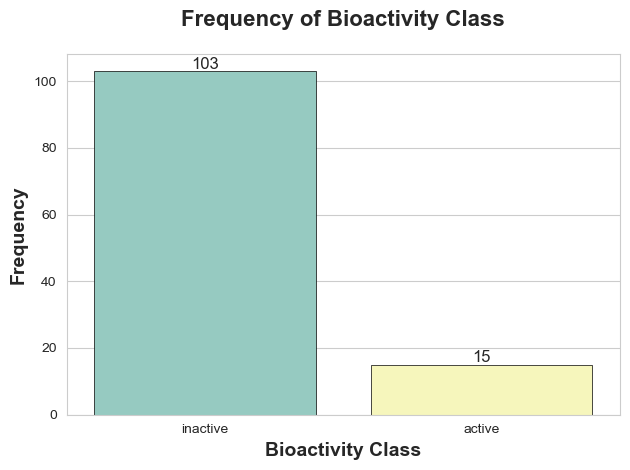

In [28]:
# Create the countplot without the unnecessary 'hue' and 'sizes'
ax = sns.countplot(
    x="bioactivity_class",
    data=bpd_2class,
    palette=colors,
    edgecolor="black",
    linewidth=0.5,
)

# Add exact counts on top of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),  # Format the label as an integer
        (
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
        ),  # Position at the center-top of the bar
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=12,
    )

# Customize labels and title
plt.xlabel("Bioactivity Class", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title("Frequency of Bioactivity Class", fontsize=16, fontweight="bold", pad=20)

# Tight layout for neat spacing
plt.tight_layout()

# Show the plot
plt.show()

# Uncomment to save the plot
# plt.savefig("plot_bioactivity_class.png", dpi=300)

### Moleculer Weight vs LogP

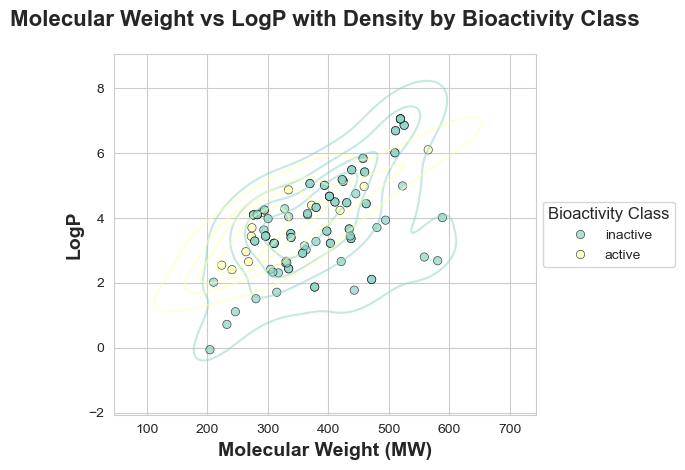

In [29]:
# Scatterplot with bioactivity class as hue
sns.scatterplot(
    x="MW",
    y="LogP",
    data=bpd_2class,
    hue="bioactivity_class",
    edgecolor="black",
    linewidth=0.5,  # Thinner edges for points
    palette=colors,  # Set the color palette
    alpha=0.7,  # Transparency for points
)

# Add density plot for each bioactivity class
for class_label in bpd_2class["bioactivity_class"].unique():
    sns.kdeplot(
        data=bpd_2class[bpd_2class["bioactivity_class"] == class_label],
        x="MW",
        y="LogP",
        levels=5,  # Adjust levels for density contours
        color=colors[
            bpd_2class["bioactivity_class"].unique().tolist().index(class_label)
        ],
        alpha=0.5,  # Transparency for density lines
        linewidths=1.5,
    )

# Customize axis labels
plt.xlabel("Molecular Weight (MW)", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")

# Customize and place the legend outside the plot
plt.legend(
    title="Bioactivity Class",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True,
    title_fontsize=12,
)

# Add a plot title
plt.title(
    "Molecular Weight vs LogP with Density by Bioactivity Class",
    fontsize=16,
    fontweight="bold",
    pad=20,
)

# Apply tight layout for neat spacing
plt.tight_layout()

# Uncomment to save the figure
# plt.savefig("plot_MW_vs_LogP_with_density.png", dpi=300)

# Show the plot
plt.show()

### Bioactivity Class and pIC50 Values

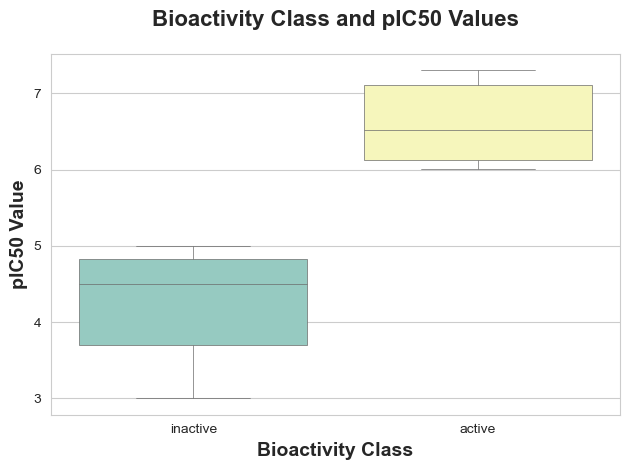

In [30]:
# Create the countplot without the unnecessary 'hue' and 'sizes'
sns.boxplot(
    x="bioactivity_class",
    y="pIC50",
    data=bpd_2class,
    palette=colors,
    linewidth=0.5,
)

# Customize labels and title
plt.xlabel("Bioactivity Class", fontsize=14, fontweight="bold")
plt.ylabel("pIC50 Value", fontsize=14, fontweight="bold")
plt.title("Bioactivity Class and pIC50 Values", fontsize=16, fontweight="bold", pad=20)

# Tight layout for neat spacing
plt.tight_layout()

# Show the plot
plt.show()

# Uncomment to save the plot
# plt.savefig("plot_bioactivity_class.png", dpi=300)

### Statistical Analysis (Mann-Whitney U Test)
- The Mann-Whitney U test is a non-parametric statistical test used to compare differences between two independent groups when the data does not meet the assumptions of parametric tests like the t-test. 

In [31]:
def mannwhitney(df, descriptor, verbose=False):
    # Seed the random number generator
    seed(1)

    # Select relevant columns
    selection = [descriptor, 'bioactivity_class']
    df_selected = df[selection]

    # Separate active and inactive classes
    active = df_selected[df_selected.bioactivity_class == 'active'][descriptor]
    inactive = df_selected[df_selected.bioactivity_class == 'inactive'][descriptor]

    # Check if either active or inactive is empty
    if active.empty or inactive.empty:
        raise ValueError(f"One of the groups is empty. Active size: {active.size}, Inactive size: {inactive.size}")

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive)

    # Interpret the result
    alpha = 0.05
    interpretation = 'Same distribution (fail to reject H0)' if p > alpha else 'Different distribution (reject H0)'

    # Create a results DataFrame
    results = pd.DataFrame(
        {
            'Descriptor': [descriptor],
            'Statistics': [stat],
            'p': [p],
            'alpha': [alpha],
            'Interpretation': [interpretation]
        }
    )

    # Save the results to a CSV file
    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)

    if verbose:
        print(f"Descriptor: {descriptor}\nStatistics: {stat}\np-value: {p}\nInterpretation: {interpretation}")

    return results


#### Mann-Whitney U Test for pIC50

In [32]:
mannwhitney(bpd_2class, 'pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1545.0,4.428384e-10,0.05,Different distribution (reject H0)


#### Mann-Whitney U Test for MW

In [33]:
mannwhitney(bpd_2class, 'MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,408.5,0.003313,0.05,Different distribution (reject H0)


#### Mann-Whitney U Test for LogP

In [34]:
mannwhitney(bpd_2class, 'LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.630683,0.05,Same distribution (fail to reject H0)


#### Mann-Whitney U Test for NumHDonors

In [35]:
mannwhitney(bpd_2class, 'NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,298.5,0.000053,0.05,Different distribution (reject H0)


#### Mann-Whitney U Test for NumHAcceptors

In [36]:
mannwhitney(bpd_2class, 'NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,414.0,0.003402,0.05,Different distribution (reject H0)


## Results

- The statistical analysis of the descriptors reveals clear differences between active and inactive compounds based on most of the key properties. The pIC50 values show a highly significant difference between actives and inactives, aligning with the expected classification based on IC50 thresholds.

- Among the four Lipinski descriptors:

    - Molecular Weight (MW), Number of Hydrogen Bond Donors (NumHDonors), and Number of Hydrogen Bond Acceptors (NumHAcceptors) all exhibit statistically significant differences between the two groups, indicating that these properties play a crucial role in distinguishing active compounds from inactive ones.
    - LogP, however, shows no significant difference, suggesting that lipophilicity does not contribute meaningfully to the separation of active and inactive compounds in this dataset.
- These findings suggest that molecular weight, hydrogen bonding capabilities (both donors and acceptors), and overall pIC50 are key factors in differentiating bioactivity, while lipophilicity (LogP) may not be as important in this specific context.

## **Lipinski's Rule of Five** vs **PubChem Fingerprint** 

Both methods are used in drug discovery and cheminformatics, but each serves a different purpose.

**1. Lipinski's Rule of Five:**
- Lipinski's Rule of Five is a set of guidelines used to evaluate the drug-likeness of small molecules, particularly their potential for oral bioavailability. It was introduced by Christopher A. Lipinski in 1997. The "rule of five" states that, generally, a drug candidate is more likely to be orally active if it satisfies the following criteria:

- Molecular weight (MW) ≤ 500 Da
- LogP (lipophilicity) ≤ 5
- Hydrogen bond donors (HBD) ≤ 5
- Hydrogen bond acceptors (HBA) ≤ 10

Purpose: Lipinski's rules are used to filter compounds for drug discovery based on their physicochemical properties, primarily to estimate oral bioavailability.

**2. PubChem Fingerprint:**
- PubChem fingerprints are a set of binary descriptors generated from molecular structures. They encode specific structural features and patterns, like the presence or absence of certain chemical substructures (e.g., rings, atoms, bonds, functional groups). These fingerprints are used in cheminformatics for similarity searching, clustering, classification, and comparing molecular structures.

- Fingerprint size: The standard PubChem fingerprint contains 881 bits that represent structural features.
Structure-based: PubChem fingerprints are structure-based, meaning they capture detailed structural information about molecules.
Binary output: Each bit in the fingerprint represents the presence (1) or absence (0) of a particular molecular feature.
Purpose: PubChem fingerprints are primarily used in molecular similarity calculations and virtual screening to find compounds with similar structures to a query molecule.

**Comparison:**
- Lipinski: Filters molecules for drug-like properties based on physicochemical traits, especially for predicting oral bioavailability.
- PubChem Fingerprint: Describes the molecular structure in binary form for comparing and clustering molecules.
- Lipinski: Focuses on general rules for drug-likeness, especially for oral drug development.
- PubChem Fingerprint: Encodes specific structural information for more detailed molecular comparisons.
- Lipinski: Used in early-stage drug discovery to filter molecules that have the potential to be orally active drugs.
- PubChem Fingerprint: Used in cheminformatics tasks like molecular similarity searches, clustering, and lead compound identification.

In summary, Lipinski’s rule is used to assess the drug-likeness of a molecule, while the PubChem fingerprint is used to compare and find similarities between molecules based on their structural features.

Resource:
- Chanin Nantasenamat(dataprofessor)